<a href="https://colab.research.google.com/github/fsrt16/Coronavirus---a-pandemic-rehdreseal-/blob/master/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [314]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")
df1 = pd.read_csv('/content/Train_dataset - Diuresis_TS.csv')
df2 = pd.read_csv('/content/Train_dataset - Train_dataset.csv')
print(df1.head())
print(df2.head())

   people_ID  20-Mar-20  21-Mar-20  ...  24-Mar-20  25-Mar-20 26-Mar-20
0          1        441        544  ...     1,002      1,216     1,473 
1          2        151        197  ...       400        493       607 
2          3        416        515  ...       948      1,150     1,396 
3          4        410        506  ...       928      1,127     1,368 
4          5        390        483  ...       893      1,084     1,316 

[5 rows x 8 columns]
   people_ID        Region  Gender  ...   salary FT/month Infect_Prob
0          1  Bhubaneshwar  Female  ...  1300000      2.0   49.135010
1          2  Bhubaneshwar  Female  ...   400000      1.0   51.147880
2          3  Bhubaneshwar  Female  ...   900000      1.0   73.224000
3          4  Bhubaneshwar  Female  ...  2300000      1.0   48.779225
4          5  Bhubaneshwar  Female  ...  1100000      1.0   87.868800

[5 rows x 28 columns]


# **Machine Learning**

Naive Approach to analyze the algorithms for further stakes


*   We are joining all relevant details to figure out the prolongment and correlation to the time series




In [14]:
Merger=pd.merge(df2,df1,on='people_ID')
Merger.drop('Designation',axis=1)
Merger.drop('people_ID',axis=1)
Merger.drop('Name',axis=1)
Merger.drop('Insurance',axis=1)
Merger.drop('salary',axis=1)
Merger.drop('FT/month',axis=1)
Merger.head(3)

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob,20-Mar-20,21-Mar-20,22-Mar-20,23-Mar-20,24-Mar-20,25-Mar-20,26-Mar-20
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,0,Hypertension,68,8,<400,Normal,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.13501,441,544,670,821,"1,002","1,216","1,473"
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,0,Diabetes,64,15,<100,Stage-02,NaN,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.14788,151,197,253,322,400,493,607
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,0,None,19,13,<300,Elevated,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.22400,416,515,632,777,948,"1,150","1,396"


# Data Description and Information

![alt text](https://upload.wikimedia.org/wikipedia/commons/6/6d/Data_types_-_en.svg)

In [16]:

print(Merger.columns)
print(Merger.info())
numeric_variables = list(Merger.select_dtypes(include=['int64','float']).columns.values)
Merger[numeric_variables]=Merger[numeric_variables].apply(lambda x: x.fillna(x.mean()),axis=0)
categorical_variables = list(Merger.select_dtypes(exclude=['int64','float','bool']).columns.values)
for s in categorical_variables:
  Merger[s] = Merger[s].fillna(Merger[s].mode())
print(Merger.info())

Index(['people_ID', 'Region', 'Gender', 'Designation', 'Name', 'Married',
       'Children', 'Occupation', 'Mode_transport', 'cases/1M', 'Deaths/1M',
       'comorbidity', 'Age', 'Coma score', 'Pulmonary score',
       'cardiological pressure', 'Diuresis', 'Platelets', 'HBB', 'd-dimer',
       'Heart rate', 'HDL cholesterol', 'Charlson Index', 'Blood Glucose',
       'Insurance', 'salary', 'FT/month', 'Infect_Prob', '20-Mar-20',
       '21-Mar-20', '22-Mar-20', '23-Mar-20', '24-Mar-20', '25-Mar-20',
       '26-Mar-20'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10714 entries, 0 to 10713
Data columns (total 35 columns):
people_ID                 10714 non-null int64
Region                    10714 non-null object
Gender                    10714 non-null object
Designation               10714 non-null object
Name                      10694 non-null object
Married                   10714 non-null object
Children                  10403 non-null float64
Occupat

## Correlation

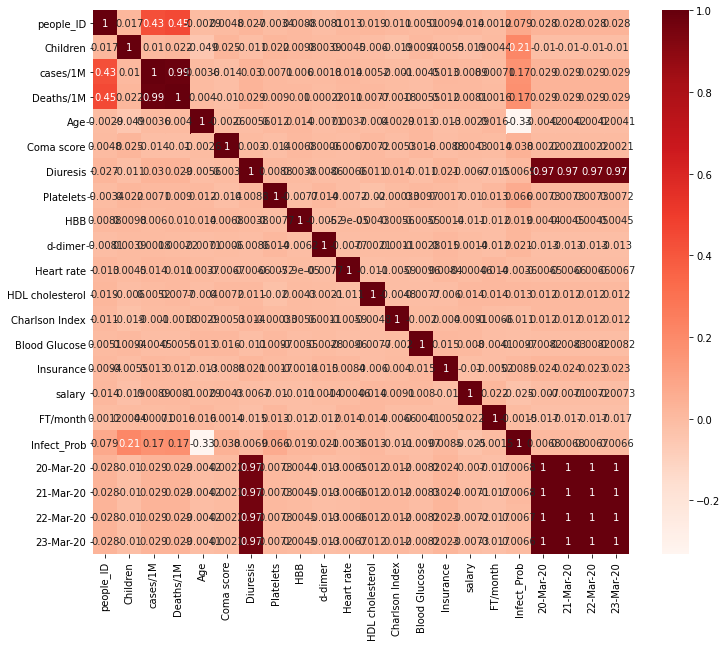

In [17]:
plt.figure(figsize=(12,10))
cor = Merger.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [20]:
cor_target = abs(cor["20-Mar-20"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Diuresis     0.966398
20-Mar-20    1.000000
21-Mar-20    0.999952
22-Mar-20    0.999930
23-Mar-20    0.999900
Name: 20-Mar-20, dtype: float64

**Thus the historical data of the person doesnot have any relation to the time series analysis, hence forth we can carry out with only df1**

In [27]:
print(df1.columns)
df1 = df1.drop('people_ID',axis =1)
df1.head()

Index(['people_ID', '20-Mar-20', '21-Mar-20', '22-Mar-20', '23-Mar-20',
       '24-Mar-20', '25-Mar-20', '26-Mar-20'],
      dtype='object')


,20-Mar-20,21-Mar-20,22-Mar-20,23-Mar-20,24-Mar-20,25-Mar-20,26-Mar-20
0,441,544,670,821,"1,002","1,216","1,473"
1,151,197,253,322,400,493,607
2,416,515,632,777,948,"1,150","1,396"
3,410,506,621,762,928,"1,127","1,368"
4,390,483,595,730,893,"1,084","1,316"


In [30]:
df1.head()

,20-Mar-20,21-Mar-20,22-Mar-20,23-Mar-20,24-Mar-20,25-Mar-20,26-Mar-20
0,441,544,670,821,"1,002","1,216","1,473"
1,151,197,253,322,400,493,607
2,416,515,632,777,948,"1,150","1,396"
3,410,506,621,762,928,"1,127","1,368"
4,390,483,595,730,893,"1,084","1,316"


In [33]:
!pip install lightgbm
!pip install catboost

     |████████████████████████████████| 64.4MB 62kB/s 


In [0]:
import re
for ind in df1.index:
  df1['20-Mar-20'][ind] = re.sub("[^0-9]", "", str(df1['20-Mar-20'][ind]))
  df1['21-Mar-20'][ind] = re.sub("[^0-9]", "", str(df1['21-Mar-20'][ind]))
  df1['22-Mar-20'][ind] = re.sub("[^0-9]", "", str(df1['22-Mar-20'][ind]))
  df1['23-Mar-20'][ind] = re.sub("[^0-9]", "", str(df1['23-Mar-20'][ind]))
  df1['24-Mar-20'][ind] = re.sub("[^0-9]", "", str(df1['24-Mar-20'][ind]))
  df1['25-Mar-20'][ind] = re.sub("[^0-9]", "", str(df1['25-Mar-20'][ind]))
  df1['26-Mar-20'][ind] = re.sub("[^0-9]", "", str(df1['26-Mar-20'][ind]))

In [82]:
df1.dtypes

people_ID    int64
20-Mar-20    int64
21-Mar-20    int64
22-Mar-20    int64
23-Mar-20    int64
24-Mar-20    int64
25-Mar-20    int64
26-Mar-20    int64
dtype: object

In [0]:
target = df1['26-Mar-20']
df1=df1.drop('26-Mar-20',axis =1)

In [0]:
def ML():
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(df1,target, test_size=0.33, random_state=42)
  name = []
  mod = []
  rmsv = []
  from sklearn import linear_model
  reg = linear_model.Lasso(alpha=0.1)
  reg.fit(X_train,y_train)
  y_pred = reg.predict(X_test)
  from sklearn.metrics import mean_squared_error
  from math import sqrt
  rms = sqrt(mean_squared_error(y_test, y_pred))
  name.append("Lasso")
  mod.append(" NA ")
  rmsv.append(rms)
  from sklearn import linear_model
  rerg1 = linear_model.ElasticNet(alpha=0.1)
  rerg1.fit(X_train,y_train)
  y_pred = rerg1.predict(X_test)
  from sklearn.metrics import mean_squared_error
  from math import sqrt
  rms = sqrt(mean_squared_error(y_test, y_pred))
  name.append("Elastic Net")
  mod.append(" NA ")
  rmsv.append(rms)
  from sklearn import linear_model
  rerg1 = linear_model.Ridge(alpha=0.1)
  rerg1.fit(X_train,y_train)
  y_pred = rerg1.predict(X_test)
  from sklearn.metrics import mean_squared_error
  from math import sqrt
  ms = sqrt(mean_squared_error(y_test, y_pred))
  name.append("Ridge")
  mod.append(" NA ")
  rmsv.append(ms)
  from sklearn.tree import DecisionTreeRegressor
  from sklearn.ensemble import AdaBoostRegressor
  regr_1 = DecisionTreeRegressor(max_depth=5)
  regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),n_estimators=300)
  regr_1.fit(X_train, y_train)
  regr_2.fit(X_train, y_train)
  y_1 = regr_1.predict(X_test)
  y_2 = regr_2.predict(X_test)
  rms1 = sqrt(mean_squared_error(y_test, y_1))
  name.append("DecisionTree Regressor")
  mod.append(" NA ")
  rmsv.append(rms1)
  rms2 = sqrt(mean_squared_error(y_test, y_2))
  name.append("AdaBoost Regressor")
  mod.append(" NA ")
  rmsv.append(rms2)
  from sklearn.ensemble import GradientBoostingRegressor
  est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)
  grb = sqrt(mean_squared_error(y_test, est.predict(X_test)) )
  name.append("GradientBoosting Regressor")
  mod.append(" NA ")
  rmsv.append(grb)
  import lightgbm as lgb
  n_estimators = 100
  n_iters = 5
  preds_buf = []
  err_buf = []
  lgb_train = lgb.Dataset(X_train, y_train)
  lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
  params = {
      'boosting_type': 'gbdt',
      'objective': 'regression',
      'metric': {'l2', 'l1'},
      'num_leaves': 31,
      'learning_rate': 0.05,
      'feature_fraction': 0.9,
      'bagging_fraction': 0.8,
      'bagging_freq': 5,
      'verbose': 0
  }
  gbm = lgb.train(params,
                  lgb_train,
                  num_boost_round=20,
                  valid_sets=lgb_eval, verbose_eval = False )
  y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
  name.append("LGB Regressor")
  mod.append(" NA ")
  rmsv.append(mean_squared_error(y_test, y_pred) ** 0.5)
  from catboost import CatBoostRegressor
  modelc = CatBoostRegressor()
  modelc.fit(X_train, y_train)
  y_pred = modelc.predict(X_test)
  from sklearn.metrics import mean_squared_error
  from math import sqrt
  rms = sqrt(mean_squared_error(y_test, y_pred))
  name.append("CAT Boost Regressor")
  mod.append(" NA ")
  rmsv.append(rms)
  from sklearn.model_selection import GridSearchCV
    
  model = CatBoostRegressor()
  parameters = {'depth'         : [6,8,10],
                    'learning_rate' : [0.01, 0.05, 0.1],
                    'iterations'    : [30, 50, 100]
                  }
  grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
  grid.fit(X_train, y_train)
  from catboost import CatBoostRegressor
  modelc = CatBoostRegressor(depth = grid.best_params_.get('depth') , iterations = grid.best_params_.get('iterations') , learning_rate = grid.best_params_.get('learning_rate'))
  modelc.fit(X_train, y_train)
  print(modelc)
  y_pred = modelc.predict(X_test)
  from sklearn.metrics import mean_squared_error
  from math import sqrt
  rms = sqrt(mean_squared_error(y_test, y_pred))
  name.append("CAT Boost Regressor Improved")
  mod.append(str(grid.best_params_))
  rmsv.append(rms)
  from xgboost.sklearn import XGBRegressor
  model = XGBRegressor(max_depth=9,min_child_weight = 1)
  model.fit(X_train, y_train)
  #print(model)
  y_pred = model.predict(X_test)
  from sklearn.metrics import mean_squared_error
  from math import sqrt
  rms = sqrt(mean_squared_error(y_test, y_pred))
  name.append("XGB Boost Regressor")
  mod.append(" NA ")
  rmsv.append(rms)
  from sklearn.model_selection import GridSearchCV   #Perforing grid search
  param_grid = {
  'max_depth':range(3,10,2),
  'min_child_weight':range(1,6,2)
  }
  logreg_cv = GridSearchCV(model, param_grid, cv = 5) 
  logreg_cv.fit(X_train, y_train,eval_metric='rmse')
  from xgboost.sklearn import XGBRegressor
  model = XGBRegressor(max_depth=logreg_cv.best_params_.get('max_depth'),min_child_weight = logreg_cv.best_params_.get('min_child_weight'))
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  from sklearn.metrics import mean_squared_error
  from math import sqrt
  rms = sqrt(mean_squared_error(y_test, y_pred))
  name.append("XGB Boost Regressor Improved")
  mod.append(str(logreg_cv.best_params_))
  rmsv.append(rms)
  dicto = {
      'Algorithm Name ':name ,
      'Algorithmic Modification ':mod,
      'Root Mean Square Value ': rmsv
  }
  dfObj = pd.DataFrame(dicto) 
  return dfObj

In [0]:
dfans = ML()

In [86]:
dfans

,Algorithm Name,Algorithmic Modification,Root Mean Square Value
0,Lasso,NA,3.841278
1,Elastic Net,NA,3.837064
2,Ridge,NA,0.974942
3,DecisionTree Regressor,NA,9.215991
4,AdaBoost Regressor,NA,1.408389
5,GradientBoosting Regressor,NA,8.493535
6,LGB Regressor,NA,104.897465
7,CAT Boost Regressor,NA,2.091381
8,CAT Boost Regressor Improved,"{'depth': 10, 'iterations': 100, 'learning_rat...",3.450154
9,XGB Boost Regressor,NA,1.380501


In [87]:
dfans.sort_values(by=['Root Mean Square Value '])

,Algorithm Name,Algorithmic Modification,Root Mean Square Value
2,Ridge,NA,0.974942
10,XGB Boost Regressor Improved,"{'max_depth': 9, 'min_child_weight': 3}",1.369699
9,XGB Boost Regressor,NA,1.380501
4,AdaBoost Regressor,NA,1.408389
7,CAT Boost Regressor,NA,2.091381
8,CAT Boost Regressor Improved,"{'depth': 10, 'iterations': 100, 'learning_rat...",3.450154
1,Elastic Net,NA,3.837064
0,Lasso,NA,3.841278
5,GradientBoosting Regressor,NA,8.493535
3,DecisionTree Regressor,NA,9.215991


Thus for a given date and new values Ridge regression will serve the basis of algorithm
However since we are requested to address a date with no given information thus our model must understand prediction based on n-1 values where oour n remains changing 

# **Time series analysis**

In [0]:
df1 = pd.read_csv('/content/Train_dataset - Diuresis_TS.csv')

## **Data Preprocessing**

![alt text](https://ephaseglobal.com/wp-content/uploads/2019/09/dfgfdgfdg.png)

In [0]:
import re
for ind in df1.index:
  df1['20-Mar-20'][ind] = re.sub("[^0-9]", "", str(df1['20-Mar-20'][ind]))
  df1['21-Mar-20'][ind] = re.sub("[^0-9]", "", str(df1['21-Mar-20'][ind]))
  df1['22-Mar-20'][ind] = re.sub("[^0-9]", "", str(df1['22-Mar-20'][ind]))
  df1['23-Mar-20'][ind] = re.sub("[^0-9]", "", str(df1['23-Mar-20'][ind]))
  df1['24-Mar-20'][ind] = re.sub("[^0-9]", "", str(df1['24-Mar-20'][ind]))
  df1['25-Mar-20'][ind] = re.sub("[^0-9]", "", str(df1['25-Mar-20'][ind]))
  df1['26-Mar-20'][ind] = re.sub("[^0-9]", "", str(df1['26-Mar-20'][ind]))

In [0]:
df1['20-Mar-20'] = df1['20-Mar-20'].astype(int)
df1['21-Mar-20'] = df1['21-Mar-20'].astype(int)
df1['22-Mar-20'] = df1['22-Mar-20'].astype(int)
df1['23-Mar-20'] = df1['23-Mar-20'].astype(int)
df1['24-Mar-20'] = df1['24-Mar-20'].astype(int)
df1['25-Mar-20'] = df1['25-Mar-20'].astype(int)
df1['26-Mar-20'] = df1['26-Mar-20'].astype(int)

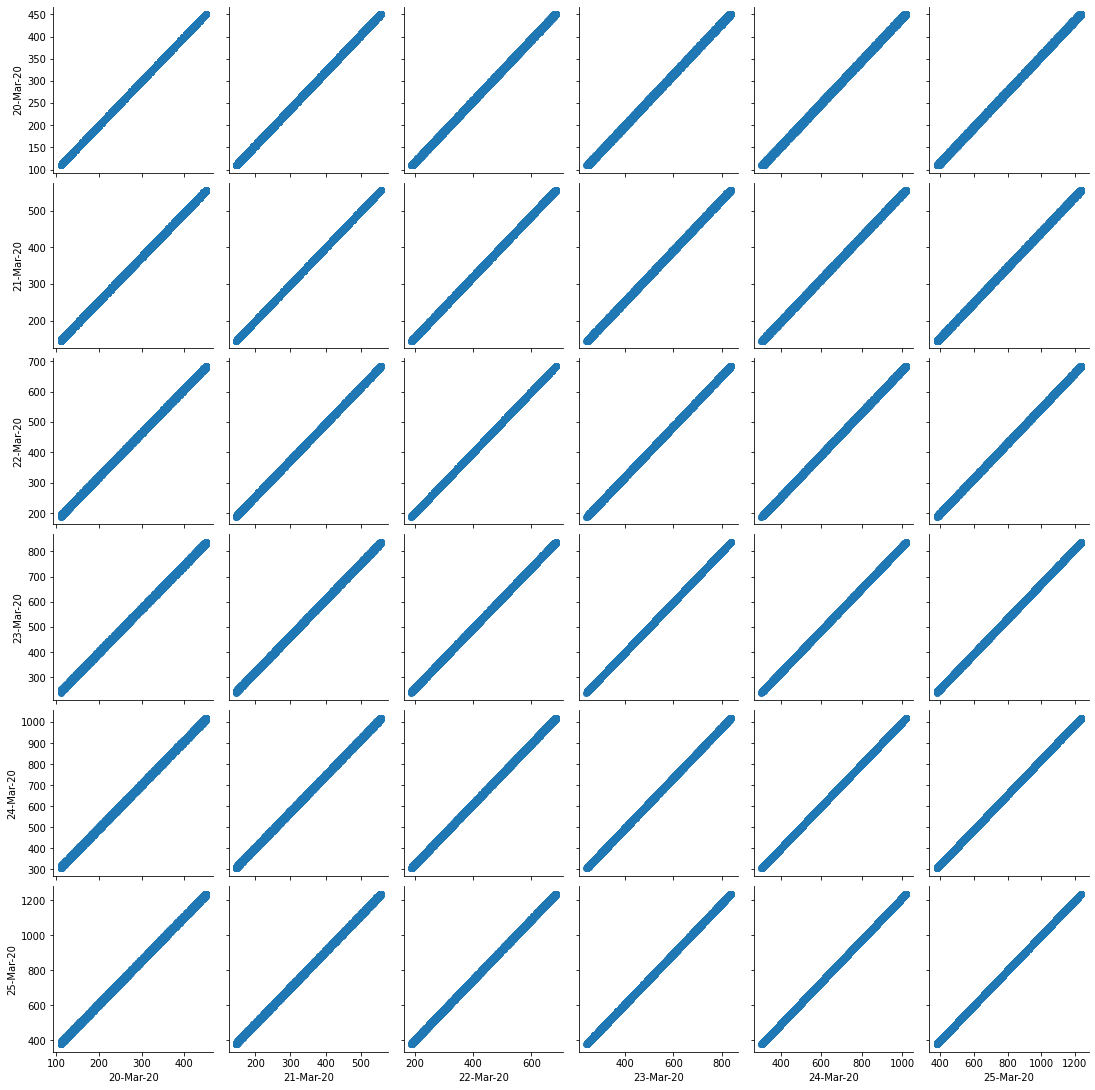

In [96]:
g = sns.PairGrid(df1)
g.map(plt.scatter);

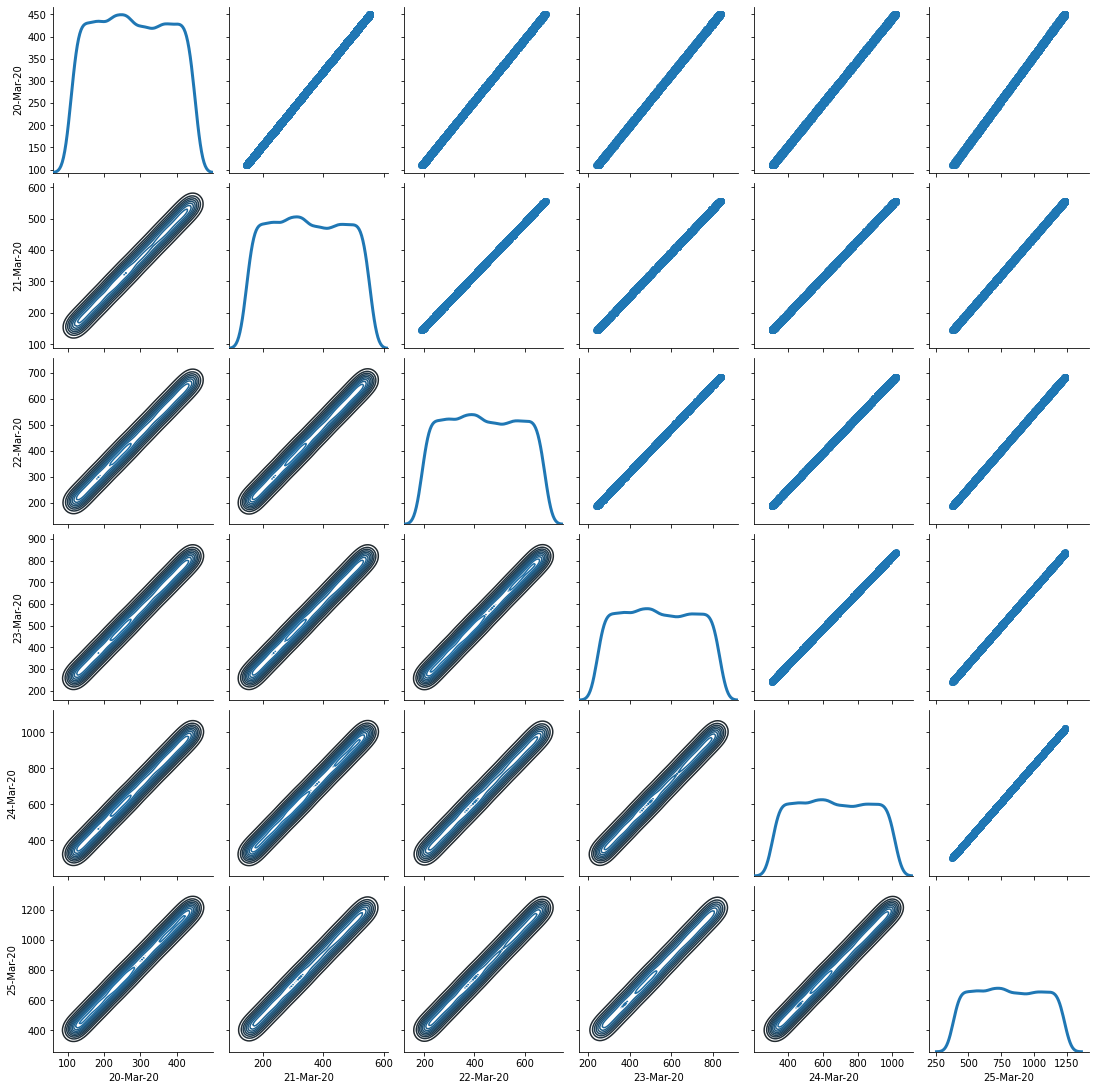

In [97]:
g = sns.PairGrid(df1)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False);

**The above pair plots suggest that the relationship is linear**

In [0]:
df1.columns=['pid','1','2','3','4','5','6','7']

In [319]:
df1

,pid,1,2,3,4,5,6,7
0,1,441,544,670,821,1002,1216,1473
1,2,151,197,253,322,400,493,607
2,3,416,515,632,777,948,1150,1396
3,4,410,506,621,762,928,1127,1368
4,5,390,483,595,730,893,1084,1316
...,...,...,...,...,...,...,...,...
10709,22691,134,174,225,288,359,444,549
10710,22692,387,479,592,725,885,1075,1303
10711,22693,177,228,288,362,448,551,677
10712,22694,352,438,543,666,815,991,1204


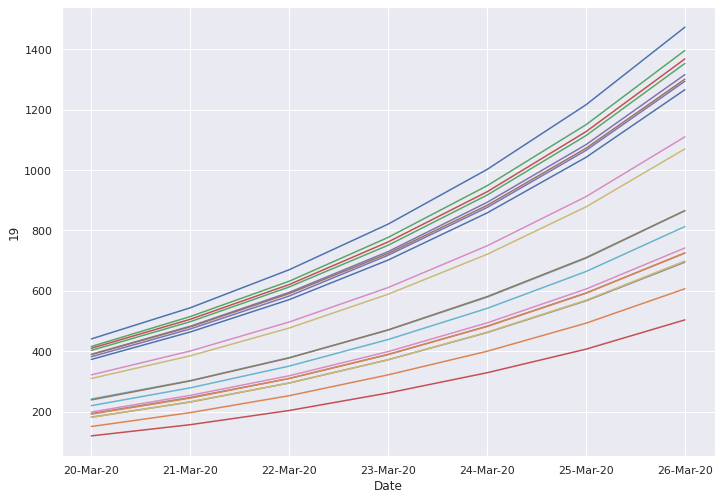

In [135]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
for i in range(0 , 20):
  import seaborn as sns; sns.set()
  import matplotlib.pyplot as plt
  fmri = sns.load_dataset("fmri")
  ax = sns.lineplot(x="Date", y=str(i), data=df)


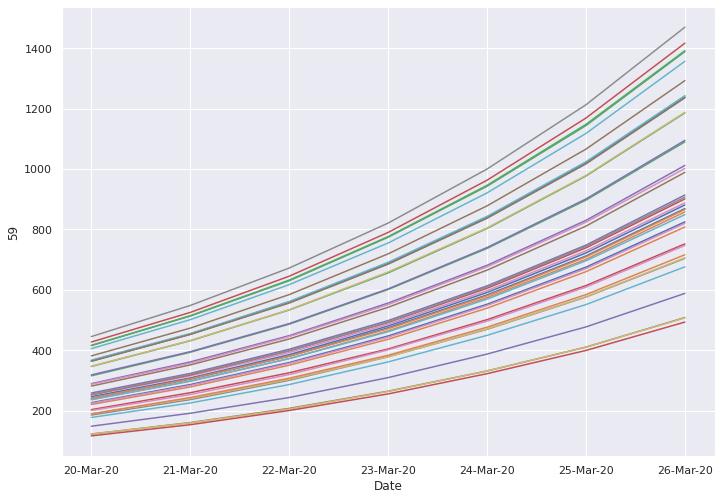

In [136]:
for i in range(20 , 60):
  import seaborn as sns; sns.set()
  import matplotlib.pyplot as plt
  fmri = sns.load_dataset("fmri")
  ax = sns.lineplot(x="Date", y=str(i), data=df)

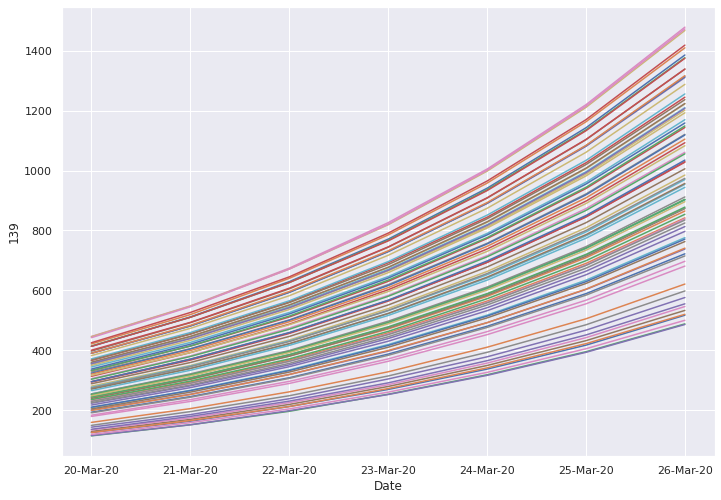

In [137]:
for i in range(60 , 140):
  import seaborn as sns; sns.set()
  import matplotlib.pyplot as plt
  fmri = sns.load_dataset("fmri")
  ax = sns.lineplot(x="Date", y=str(i), data=df)

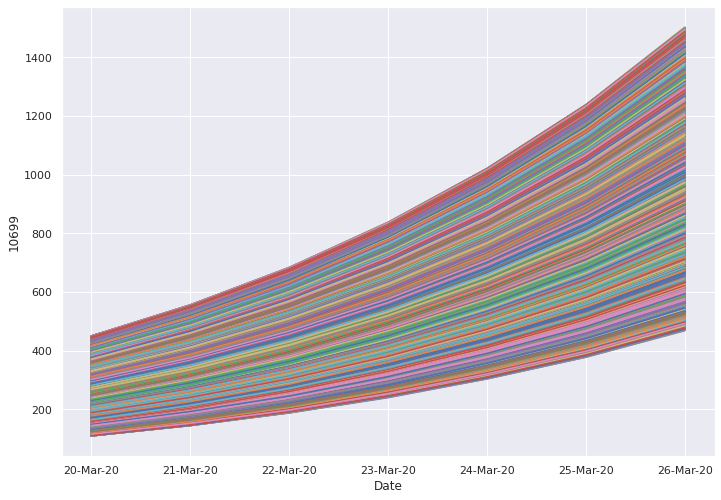

In [138]:
for i in range(0 , 10700):
  import seaborn as sns; sns.set()
  import matplotlib.pyplot as plt
  fmri = sns.load_dataset("fmri")
  ax = sns.lineplot(x="Date", y=str(i), data=df)

*The above line shart showcase the presence of discripency in the behaviour of time series and also the clustering presence of intuitively 2-3 sections one with low overall , meduim and tentitively high*

# Simple Regression

In [226]:
df['Date']=[20,21,22,23,24,25,26]
df

,Date,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,10674,10675,10676,10677,10678,10679,10680,10681,10682,10683,10684,10685,10686,10687,10688,10689,10690,10691,10692,10693,10694,10695,10696,10697,10698,10699,10700,10701,10702,10703,10704,10705,10706,10707,10708,10709,10710,10711,10712,10713
0,20,441,151,416,410,390,389,322,194,310,242,373,192,403,120,382,239,199,182,181,220,246,220,415,203,148,381,251,185,365,405,240,236,315,253,289,281,200,365,189,...,436,301,149,426,268,165,176,178,250,189,411,124,302,426,395,388,149,418,234,159,431,248,145,218,372,347,379,256,417,389,339,241,183,297,397,134,387,177,352,181
1,21,544,197,515,506,483,481,401,247,385,303,464,245,498,157,474,302,254,232,233,279,308,278,514,259,191,473,315,236,454,501,304,297,393,318,361,351,253,453,240,...,536,376,195,526,335,214,224,227,314,241,508,164,376,526,487,482,193,516,296,204,532,313,187,275,461,430,468,320,515,480,421,305,233,370,489,174,479,228,438,230
2,22,670,253,632,621,595,591,497,310,477,379,571,310,613,204,583,378,319,295,295,351,385,350,632,325,243,584,392,300,560,617,380,372,486,398,448,437,319,558,303,...,659,468,250,648,418,272,284,286,393,304,626,213,467,647,601,595,246,634,369,261,653,392,239,345,570,531,577,400,633,590,519,383,293,460,604,225,592,288,543,290
3,23,821,322,777,762,730,724,611,389,589,470,702,390,751,262,718,471,399,372,372,439,480,436,776,404,309,719,486,378,688,755,474,464,601,492,556,542,401,686,378,...,805,578,318,794,520,343,356,361,490,381,770,272,577,792,736,728,312,776,461,330,798,488,304,429,699,651,708,497,777,723,639,477,368,568,742,288,725,362,666,366
4,24,1002,400,948,928,893,883,749,483,721,579,858,482,917,329,876,581,494,462,463,542,591,539,946,501,387,878,597,469,842,921,583,574,737,605,681,665,496,838,470,...,982,710,398,968,639,426,442,447,604,473,940,343,708,967,897,889,391,945,569,411,973,602,380,530,854,796,864,613,949,882,781,588,458,698,907,359,885,448,815,455
5,25,1216,493,1150,1127,1084,1072,912,593,878,708,1042,592,1114,407,1065,710,606,567,569,664,722,660,1148,614,477,1066,729,576,1023,1118,712,701,897,739,830,811,609,1019,577,...,1191,865,491,1175,780,524,543,550,737,581,1141,425,862,1173,1089,1080,482,1146,695,506,1181,735,469,649,1037,968,1050,748,1152,1071,950,719,563,851,1101,444,1075,551,991,559
6,26,1473,607,1396,1368,1316,1301,1110,725,1070,865,1266,726,1353,504,1294,866,742,695,699,813,881,808,1392,752,588,1293,888,704,1242,1357,869,858,1090,901,1012,989,747,1237,706,...,1445,1054,603,1424,952,645,667,674,900,713,1385,524,1049,1424,1323,1312,594,1392,848,622,1433,896,577,794,1261,1176,1273,914,1398,1301,1154,878,690,1035,1337,549,1303,677,1204,687


## LINEAR GRAPHING APPROACH

In [351]:
df1.head()

,pid,1,2,3,4,5,6,7
0,1,441,544,670,821,1002,1216,1473
1,2,151,197,253,322,400,493,607
2,3,416,515,632,777,948,1150,1396
3,4,410,506,621,762,928,1127,1368
4,5,390,483,595,730,893,1084,1316


In [346]:
dicto={'Date':[8]}
prt = pd.DataFrame(dicto)
prt

,Date
0,8


In [347]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(temporaryd,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [348]:
y_pred = reg.predict(prt)
y_pred

array([652.02625588])

In [341]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=0.004)
reg.fit(temporaryd,target)

Ridge(alpha=0.004, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [342]:
y_pred = reg.predict(prt)
y_pred


array([274.94890731])

# After Multiple trials the best algorithm found is :
Lasso Regression out of all present

In [0]:
ans = []
for i in df1['pid']:
  temporaryd = df1[['pid',str(7)]]
  target = temporaryd[str(7)]
  temporaryd = temporaryd.drop(str(7),axis=1)
  from sklearn import linear_model
  reg = linear_model.Lasso(alpha=0.1)
  reg.fit(temporaryd,target)
  y_pred = reg.predict(prt)
  ans.append(y_pred)


In [357]:
len(ans)

10714

In [358]:
test = pd.read_csv('/content/Test_dataset.xlsx - Test_dataset.csv')
test.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,Delhi,Female,Mrs,smt rekha prajapat,YES,2,Driver,Public,4,1,Diabetes,52,3,<200,Stage-01,388,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,Delhi,Male,Mr,nirmal,YES,2,Legal,Walk,4,1,Diabetes,53,11,<200,Stage-01,409,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,Delhi,Female,Mrs,pinky,YES,2,Sales,Car,4,1,Diabetes,35,9,<100,Stage-02,440,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,Delhi,Female,Mrs,pooja @aafrin,YES,2,Sales,Car,4,1,None,31,12,<300,Elevated,206,78,83,211,87,52,13,6,3100000,600000,2
4,5099,Delhi,Female,Mrs,anjali,YES,2,Business,Car,4,1,Diabetes,51,6,<200,Stage-01,229,109,207,312,94,68,39,5,2300000,1500000,1


In [0]:
for ind in test.index:
  print(test['people_ID'][ind])
  test['Diuresis'][ind] = ans[int(test['people_ID'][ind])]

In [0]:
test.to_csv ('/content/test.csv', index = False, header=True)

# ***Other Methods***

# LSTM 

With less data per person the output or the RMS values should not be goot at all

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/12/10131302/13.png)

*We are not interested in the date, given that each observation is separated by the same interval of one day. *

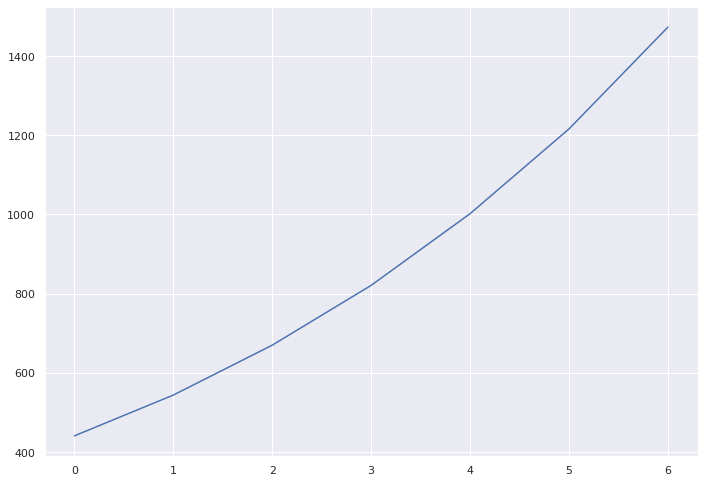

In [143]:
plt.plot(df[['0']])

In [0]:

import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [0]:
dataset = df[['0']]
dataset = dataset.astype('float32')

# **Normalization**

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

## **Split**

In [161]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

4 3


In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [0]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

## **Model**

In [0]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10000, batch_size=1, verbose=2)

## **Prediction**

In [166]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.00 RMSE
Test Score: 102.65 RMSE


![alt text](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2016/07/LSTM-Trained-on-Regression-Formulation-of-Passenger-Prediction-Problem-1.png)

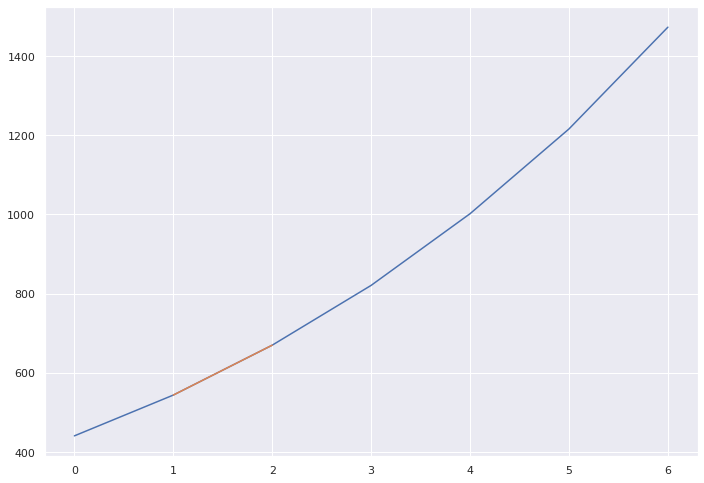

In [167]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## **Conclusion** : Lstm didnt suit the cause at all


# ARIMA
**Autoregressive Integrated Moving Average.**

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.
ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

In [0]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [0]:
df['Date']= pd.to_datetime(df['Date']) 

In [172]:
df[['Date']].min(),df[['Date']].max()

(Date   2020-03-20
 dtype: datetime64[ns], Date   2020-03-26
 dtype: datetime64[ns])

In [173]:
data = df.set_index('Date')
data.index

DatetimeIndex(['2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23',
               '2020-03-24', '2020-03-25', '2020-03-26'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [0]:
y = data['1'].resample('MS').mean()

In [184]:
y['2020-03':]

Date
2020-03-01    346.142857
Freq: MS, Name: 1, dtype: float64

In [187]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [192]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        
        
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0


In [0]:
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

![alt text](https://people.duke.edu/~rnau/411arim3_files/image002.png)

![alt text](https://assets.digitalocean.com/articles/eng_python/arima/part_2_fig_2.png)

Due to very low data ARIMA model is also failing to give any reasonable prediction